In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np

FIELLER: calculates confidence limits for a ratio according Fieller's theorem. Output includes the approximate SD of the ratio r = a / b, given the SD of a (the numerator) and of b (the denominator) and the correlation coefficient between a & b (zero if they are independent). 
Fieller requires the t-statistic which can be provided from a table or calculated from alpha and the degrees of freedom. Alpha-level deviation is for two tailed distribution (e.g. 0.05 leaves 90% area).

In [3]:
from dcstats.fieller import Fieller

In [4]:
a, b = 14, 7 # Nominator and denominator
sa, sb = 3, 2 # SD of nominator and denominator
r = 0 # Correlation coefficient (a,b)
alpha = 0.05 # alpha
n = 12 # Total number of observations na + nb

In [5]:
flr = Fieller(a, b, sa, sb, r, alpha, n)

In [6]:
print(flr)


 Fieller calculation result: 
 Ratio (a/b) = 2.000000
 t(df=10, alpha=0.05) = 2.228138

 Confidence limits: lower 0.889734, upper 5.836045
 Approximate SD of ratio = 0.714286
 Approximate CV of ratio (%) = 35.714286
 Approximate limits: lower 0.408473, upper 3.591527


### Some explorations below

Following are results from GraphPad calculator:   
https://www.graphpad.com/quickcalcs/errorProp2/

 CI of a quotient

Mean of Variable A divided by Mean of Variable B = 2.00

|         |                    |
|---------|--------------------|
| 90% CI: |   1.54 	to 	2.64   |
| 95% CI: |   1.46 	to 	2.83   |
| 99% CI: |	  1.27 	to 	3.36   |

 Variables:

|     |  Variable A  |  Variable B   |
|-----|--------------|---------------|
|Mean |	  14.00      |    7.00       |
|SD   |   3.00 	     |    2.00       |
|SEM  |	  1.22 	     |    0.82       |
|N 	  |    6 	     |     6         |

These results assume that both variables follow a Gaussian distribution
and that the measurements of Variable A are not paired or matched to
measurements of Variable B.

Results computed by the method of EC Fieller, Suppl to
J.R.Statist.Soc, 7,1-64

Wikipedia:   https://en.wikipedia.org/wiki/Fieller%27s_theorem

### Generate random samples

In [7]:
np.random.seed(1984)
T1 = np.random.normal(loc=14.0, scale=3.0, size=6)
T1

array([13.91929332, 11.93217894, 16.68841531, 12.00697301, 17.06415974,
       11.28259094])

In [8]:
T2 = np.random.normal(loc=7.0, scale=2.0, size=6)
T2

array([8.45046464, 5.13399866, 6.9867855 , 5.67841247, 9.41553608,
       8.57737076])

In [9]:
print('T1: mean= {0:.3f}, SD= {1:.3f}'.format(np.mean(T1), np.std(T1, ddof=1)))
print('T2: mean= {0:.3f}, SD= {1:.3f}'.format(np.mean(T2), np.std(T2, ddof=1)))
print('Ratio (T1/T2)= {0:.3f}'.format(np.mean(T1) / np.mean(T2)))

T1: mean= 13.816, SD= 2.532
T2: mean= 7.374, SD= 1.721
Ratio (T1/T2)= 1.874


In [10]:
def bootstrap_ratio(S1, S2, runs=5000):
    ratios = np.zeros(runs)
    #mean = np.mean(S)
    for i in range(runs):
        a = np.mean(np.random.choice(S1, size=len(S1), replace=True))
        b = np.mean(np.random.choice(S2, size=len(S2), replace=True))
        ratios[i] = a / b
    ratios.sort()
    return ratios

In [11]:
repeats = 50000
booted = bootstrap_ratio(T1, T2, repeats)

In [12]:
ratio_of_means = np.mean(T1) / np.mean(T2)
print('ratio= {0:.3f}; bootstrapped mean= {1:.3f}; bias= {2:.3f}'.
     format(ratio_of_means, np.mean(booted), ratio_of_means-np.mean(booted)))
print('bootstrapped SDM= {0:.3f}'.format(np.std(booted, ddof=1)))

ratio= 1.874; bootstrapped mean= 1.888; bias= -0.014
bootstrapped SDM= 0.212


In [13]:
lower95CI = booted[int(0.025 * repeats)]
upper95CI = booted[int(0.975 * repeats)]
print('95% confidence limits (bootstrapping):\n lower= {0:.3f}; upper= {1:.3f}'
      .format(lower95CI, upper95CI))

95% confidence limits (bootstrapping):
 lower= 1.525; upper= 2.348


 GraphPad calculator (Fieller; normality assumption)
 
 95% CI: 1.3023 to 2.7403 

Black solid line: original sample mean
Black dashed line: bootstrap mean
Red dashed lines: lower and upper 95% confidence limits


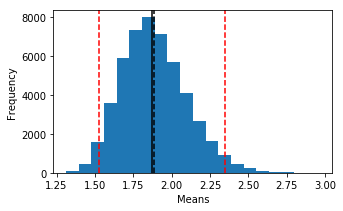

In [14]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.hist(booted, 20)
ax.axvline(x=ratio_of_means, color='k')
ax.axvline(x=np.mean(booted), color='k', linestyle="dashed")
ax.axvline(x=lower95CI, color='r', linestyle="dashed")
ax.axvline(x=upper95CI, color='r', linestyle="dashed")
ax.set_ylabel("Frequency")
ax.set_xlabel('Means')
print('Black solid line: original sample mean')
print('Black dashed line: bootstrap mean')
print('Red dashed lines: lower and upper 95% confidence limits')

In [15]:
flr1 = Fieller(np.mean(T1), np.mean(T2), np.std(T1, ddof=1), np.std(T2, ddof=1), 
              0, 0.05, len(T1)+len(T2))

In [16]:
print(flr1)


 Fieller calculation result: 
 Ratio (a/b) = 1.873617
 t(df=10, alpha=0.05) = 2.228138

 Confidence limits: lower 0.960007, upper 4.177313
 Approximate SD of ratio = 0.556081
 Approximate CV of ratio (%) = 29.679550
 Approximate limits: lower 0.634591, upper 3.112642


### Expand Fieller calculation

In [17]:
a = np.mean(T1)
b = np.mean(T2)
sa = np.std(T1, ddof=1)
sb = np.std(T2, ddof=1)
na = len(T1)
nb = len(T1)
r = 0

In [18]:
va = sa * sa
vb = sb * sb
cov = r * sa * sb

ratio = a / b
rat2 = ratio * ratio

#pooled variance
vp = ((na - 1) * va + (nb - 1) * vb) / (na + nb - 2)
print('pooled variance=', vp)

pooled variance= 4.686880655530482


In [19]:
import dcstats.statistics_EJ as s
alpha = 0.05
two_tail = 1 - alpha/2.0
df = na + nb - 2
tval = s.InverseStudentT(df, two_tail)
print('tval=', tval)

tval= 2.2281380370259285


In [20]:
#g = tval**2 * vp * vb / b**2
g = tval**2 * vb / b**2
print('g= ', g)

g=  0.2705859457729724


In [21]:
disc = va - 2.0 * ratio * cov + rat2 * vb - g * (va - r * r * va)
print('disc=', disc)

disc= 15.078812807969117


In [22]:
d = (tval / b) * np.sqrt(disc)
print('d=', d)
pre = ratio - g * cov / vb
print('pre=', pre)
f = 1.0 / (1.0 - g)
print('f=', f)

d= 1.1733743487881436
pre= 1.873616628169721
f= 1.3709634386736858


In [23]:
clower = f * (pre - d)
cupper = f * (pre + d)
print('CIlower= {0:.3f}; CIupper= {1:.3f}'.format(clower, cupper))

CIlower= 0.960; CIupper= 4.177


##### Calculate approximate CI (also without correlation)

In [24]:
disc_aprx = 1.0 / na + ratio**2 / nb
print(disc_aprx)

0.7517398782256791


In [25]:
d_aprx = (tval * np.sqrt(vp) / b) * np.sqrt(disc_aprx)
print(d_aprx)

0.5671902504656662


In [26]:
aclower = (ratio - d_aprx)
acupper = (ratio + d_aprx)
print("approximate CI's: CIlower= {0:.3f}; CIupper= {1:.3f}".format(aclower, acupper))

approximate CI's: CIlower= 1.306; CIupper= 2.441


### Exploring ratio.py module

In [27]:
from dcstats.ratio import Ratio

In [28]:
rt = Ratio(T1, T2)

In [29]:
print(rt)


Ratio = 1.87 +/- 0.17 (approximate SDM)
	approximate 95% confidence limits:
	lower= 1.5; upper= 2.24
	Fieller 95% confidence limits:
	lower= 1.44; upper= 2.49

Reciprocal = 0.534 +/- 0.089 (approximate SDM)
	approximate 95% confidence limits:
	lower= 0.336; upper= 0.731


In [30]:
rt.CIs_bootstrap(50000)

In [31]:
print(rt)


Ratio = 1.87 +/- 0.17 (approximate SDM)
	approximate 95% confidence limits:
	lower= 1.5; upper= 2.24
	Fieller 95% confidence limits:
	lower= 1.44; upper= 2.49

Reciprocal = 0.534 +/- 0.089 (approximate SDM)
	approximate 95% confidence limits:
	lower= 0.336; upper= 0.731

Bootsrapping statistics; repeats = 50000
Ratio= 1.87 +/- 0.21 (bootstrapped SDM); bias= -0.014
	95% confidence limits (bootstrapped):
	lower= 1.52; upper= 2.35
Reciprocal= 0.534 +/- 0.059 (bootstrapped SDM)
	95% confidence limits (bootstrapped):
	lower= 0.425; upper= 0.657
